In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
# DropOut is used to get rid of the overfitting problem

from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k

In [3]:
# Number of Classes
num_classes = 10

In [4]:
# Batch Size and number of epochs
batch_size = 64
epochs = 26

In [5]:
# Input Image Dimensions
img_rows, img_cols = 28, 28

In [6]:
# Spliting the data into train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# Reshaping the data
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
input_shape

(28, 28, 1)

In [10]:
# Type Conversion and Scale the test and the training data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Here we are scaling down the pixel size from (0 - 255) for general rgb
X_train /= 255.
X_test /= 255.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [11]:
# Convert the class Vectors to Binary Class Matrices. One Hot Encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
# Defining the Model
model = Sequential()

In [13]:
# Making the CNN Archicture for the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Define the Compile to minimize Categorical loss, using some optimizers to optimize and maximising accuracy
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Train the Model and test the model with the train data after each cycle (epoch)
# through the training data return history of loss and the accuracy of each epoch

hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.7230 - loss: 0.7534 - val_accuracy: 0.8608 - val_loss: 0.3852
Epoch 2/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.8706 - loss: 0.3583 - val_accuracy: 0.8712 - val_loss: 0.3590
Epoch 3/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.8884 - loss: 0.3060 - val_accuracy: 0.8928 - val_loss: 0.3025
Epoch 4/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9023 - loss: 0.2654 - val_accuracy: 0.8950 - val_loss: 0.2885
Epoch 5/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9083 - loss: 0.2496 - val_accuracy: 0.8952 - val_loss: 0.2933
Epoch 6/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9145 - loss: 0.2269 - val_accuracy: 0.9063 - val_loss: 0.2668
Epoch 7/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9210 - loss: 0.2123 - val_accuracy: 0.9010 - val_loss: 0.2763
Epoch 8/26
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9250 - loss: 0.1968 - 

In [15]:
# Evaluate the model with the test data samples to get the real scores of the actual data
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.4969567358493805
Test Accuracy: 0.9072999954223633


/tmp/ipython-input-3187479573.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Training Accuracy", "validation Accuracy")


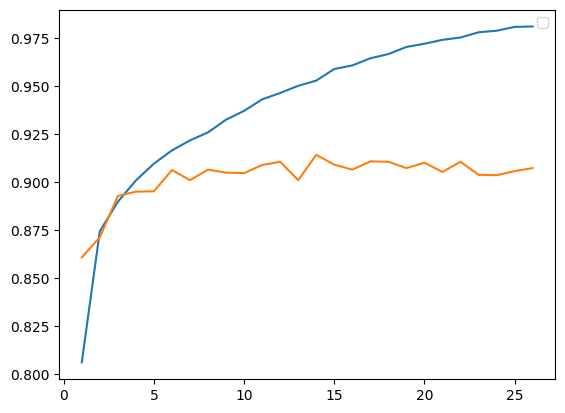

In [16]:
# Plotting data to see the relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend("Training Accuracy", "validation Accuracy")
plt.show()

In [17]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


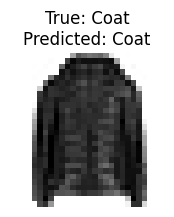

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


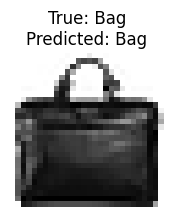

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


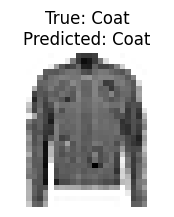

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a few images from the test set
num_test_images = 3
# Get random indices to pick images
random_indices = np.random.choice(X_test.shape[0], num_test_images, replace=False)

for i, idx in enumerate(random_indices):
    # Reshape the image for display (remove the channel dimension)
    img_to_display = X_test[idx].reshape(img_rows, img_cols)

    # Get the true label
    true_label_one_hot = y_test[idx]
    true_label_index = np.argmax(true_label_one_hot)
    true_label_name = class_names[true_label_index]

    # Make a prediction with the model
    # The model expects a batch, so we need to add an extra dimension
    prediction_one_hot = model.predict(X_test[idx:idx+1])
    predicted_label_index = np.argmax(prediction_one_hot)
    predicted_label_name = class_names[predicted_label_index]

    # Plot the image and prediction
    plt.figure(figsize=(2,2))
    plt.imshow(img_to_display, cmap=plt.cm.binary)
    plt.title(f"True: {true_label_name}\nPredicted: {predicted_label_name}")
    plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.88      0.85      1000
       Dress       0.94      0.90      0.92      1000
        Coat       0.91      0.80      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.69      0.81      0.75      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



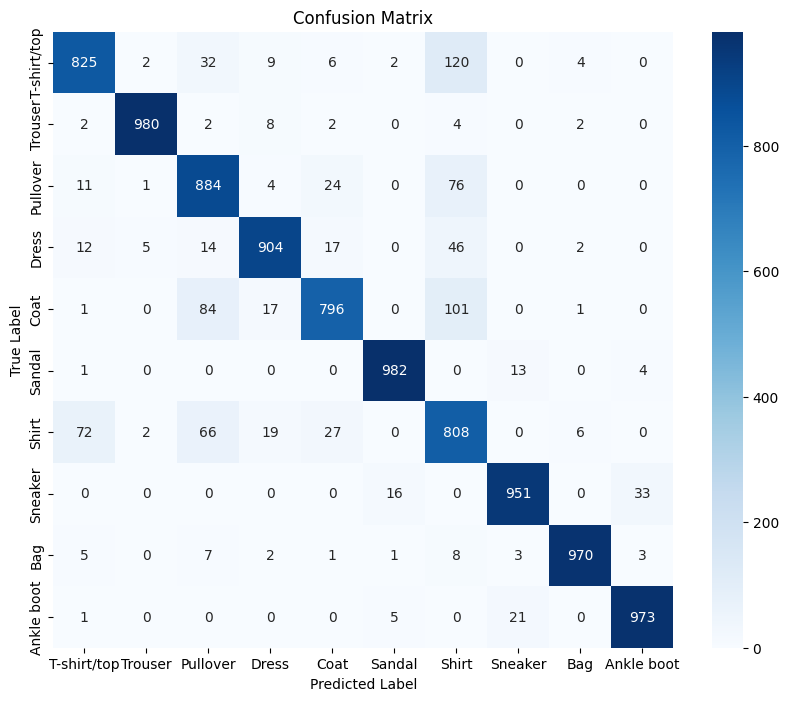

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()